<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/bivariate_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('http://ishelp.info/data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
bmi = df['bmi']
charges = df['charges']
age = df['age']
correlation = np.corrcoef(bmi, charges)[0, 1]
correlation = np.corrcoef(age, charges)[0, 1]
correlation

np.float64(0.29900819333064754)

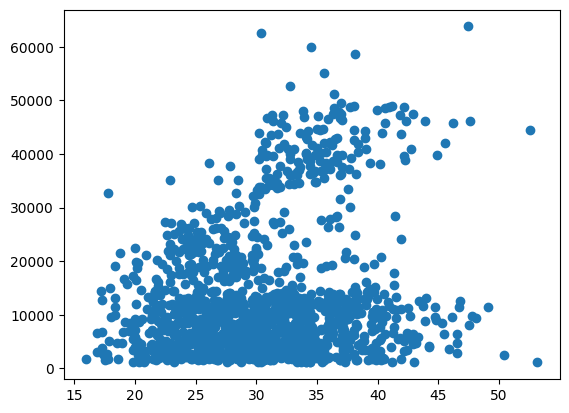

In [7]:
plt.scatter(bmi, charges)
plt.show()

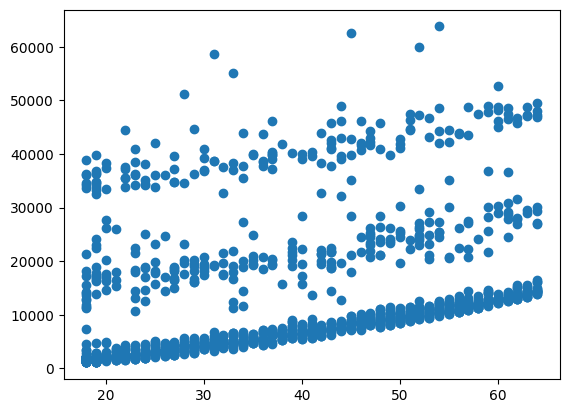

In [10]:
plt.scatter(age, charges)

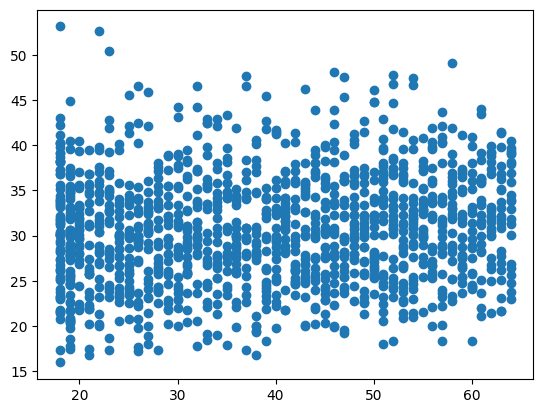

In [11]:
plt.scatter(age, bmi)

In [13]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
south_west = np.mean(df[df['region'] == 'southwest']['charges'])
south_east = np.mean(df[df['region'] == 'southeast']['charges'])
north_east = np.mean(df[df['region'] == 'northeast']['charges'])
north_west = np.mean(df[df['region'] == 'northwest']['charges'])

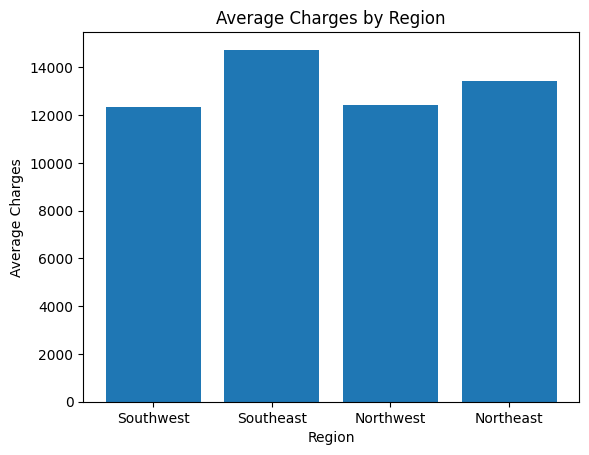

In [17]:
regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
means = [south_west, south_east, north_west, north_east]

plt.bar(regions, means)
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.title('Average Charges by Region')
plt.show()

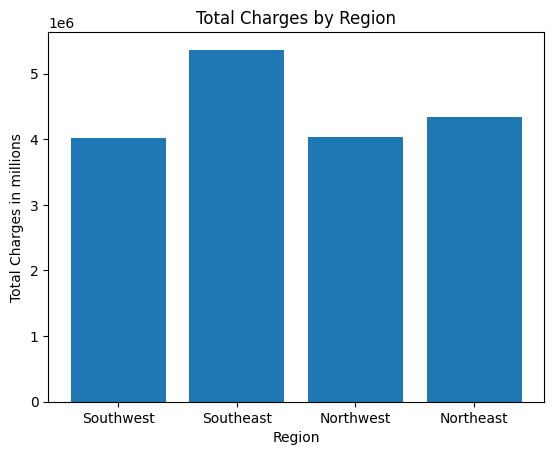

In [20]:
#total charges per region
south_west = np.sum(df[df['region'] == 'southwest']['charges'])
south_east = np.sum(df[df['region'] == 'southeast']['charges'])
north_east = np.sum(df[df['region'] == 'northeast']['charges'])
north_west = np.sum(df[df['region'] == 'northwest']['charges'])

regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
sums = [south_west, south_east, north_west, north_east]

plt.bar(regions, sums)
plt.xlabel('Region')
plt.ylabel('Total Charges in millions')
plt.title('Total Charges by Region')
plt.show()

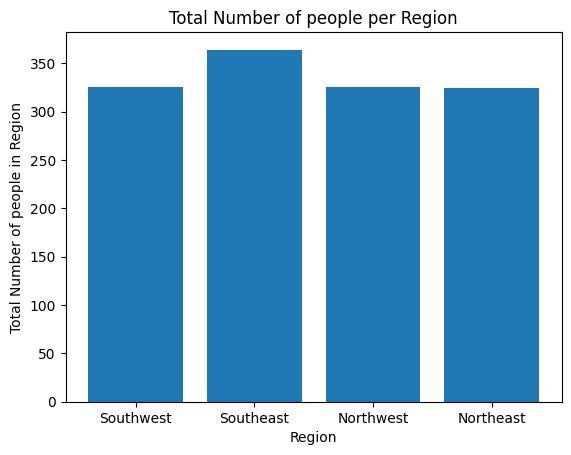

In [21]:
#total number of people per region

south_west = len(df[df['region'] == 'southwest']['charges'])
south_east = len(df[df['region'] == 'southeast']['charges'])
north_east = len(df[df['region'] == 'northeast']['charges'])
north_west = len(df[df['region'] == 'northwest']['charges'])

regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
total = [south_west, south_east, north_west, north_east]

plt.bar(regions, total)
plt.xlabel('Region')
plt.ylabel('Total Number of people in Region')
plt.title('Total Number of people per Region')
plt.show()

In [22]:
len(df)

1338

In [23]:
age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [32]:
age_groups_nums = { i: len(df[df['age'] == i]) for i in age.unique()}

{np.int64(19): 68,
 np.int64(18): 69,
 np.int64(28): 28,
 np.int64(33): 26,
 np.int64(32): 26,
 np.int64(31): 27,
 np.int64(46): 29,
 np.int64(37): 25,
 np.int64(60): 23,
 np.int64(25): 28,
 np.int64(62): 23,
 np.int64(23): 28,
 np.int64(56): 26,
 np.int64(27): 28,
 np.int64(52): 29,
 np.int64(30): 27,
 np.int64(34): 26,
 np.int64(59): 25,
 np.int64(63): 23,
 np.int64(55): 26,
 np.int64(22): 28,
 np.int64(26): 28,
 np.int64(35): 25,
 np.int64(24): 28,
 np.int64(41): 27,
 np.int64(38): 25,
 np.int64(36): 25,
 np.int64(21): 28,
 np.int64(48): 29,
 np.int64(40): 27,
 np.int64(58): 25,
 np.int64(53): 28,
 np.int64(43): 27,
 np.int64(64): 22,
 np.int64(20): 29,
 np.int64(61): 23,
 np.int64(44): 27,
 np.int64(57): 26,
 np.int64(29): 27,
 np.int64(45): 29,
 np.int64(54): 28,
 np.int64(49): 28,
 np.int64(47): 29,
 np.int64(51): 29,
 np.int64(42): 27,
 np.int64(50): 29,
 np.int64(39): 25}

In [31]:
ages = list(age.unique())
total_number_per_age_group = [age_groups_nums[i] for i in age_groups_nums.keys()]

KeyError: 0

In [27]:
len(ages) == len(total_number_per_age_group)

True

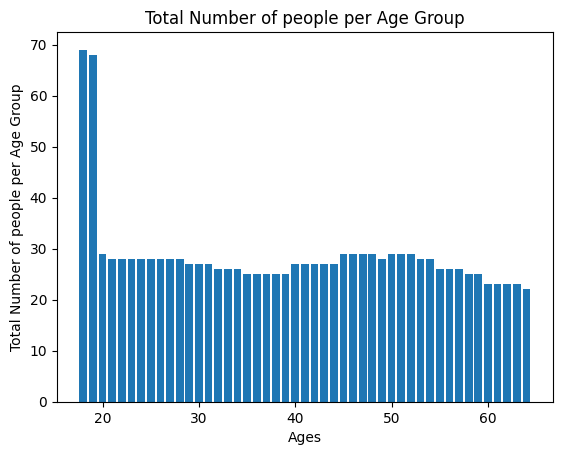

In [33]:
plt.bar(ages, total_number_per_age_group)
plt.xlabel('Ages')
plt.ylabel('Total Number of people per Age Group')
plt.title('Total Number of people per Age Group')
plt.show()

In [29]:
len(df[df['age'] == 60])

23

In [46]:
charges_per_age_group = { i: np.mean(df[df['age'] == i]['charges']) for i in age.unique()}
new_charges = [mean for mean in charges_per_age_group.values()]

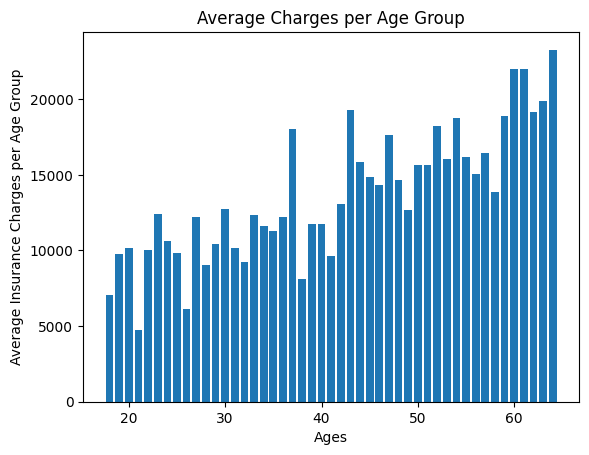

In [50]:
plt.bar(ages, new_charges)
plt.xlabel('Ages')
plt.ylabel('Average Insurance Charges per Age Group')
plt.title('Average Charges per Age Group')
plt.show()